In [18]:
# Testcell
import numpy as np
x=np.array([1,4,1])
y=np.array([1,2,3])
z2=x*y
print(z2)
z=x@y
max(3,4)
print(np.append(np.random.exponential(4, (10,2)),np.random.exponential(0.5, (10,2))))



[1 8 3]
[ 6.89157929  3.97291194  1.86933348  2.49578467 12.540049    9.21061792
  3.25183378 11.40364988  1.87251194  0.47048124  6.78471177  1.48547021
  0.77980848  1.70530711  3.93658317 12.91194614  8.36956811  4.69669012
  4.50198237  0.04256438  0.80455765  0.18480867  0.22663796  0.34090565
  1.00298651  0.30689907  1.26465817  0.05582667  0.67974575  0.16741849
  0.50507813  1.04114811  0.13364835  0.11449898  1.59673565  0.52948034
  0.02684264  1.05191965  2.16751894  0.15426682]


In [65]:
import numpy as np


#this class wraps our classifier function f and it 
#provides a a member method to perform the OneStep function 
#on our parameters beta and b.
class Classifier:
    def __init__(self, x, y, C, kernel = np.dot):
        self.x = x
        self.y = y
        self.C = C
        self.kernel = kernel
        self.beta = np.zeros(y.size)
        self.b = .0
        self.fx = np.zeros(y.size)

    def OneStep(self, i, j):
        beta_i_old = self.beta[i]
        beta_j_old = self.beta[j]
        delta = self.y[i]*((self.fx[j]-self.y[j])-(self.fx[i]-self.y[i]))
        s = self.y[i]*self.y[j]
        chi = self.kernel(self.x[i],self.x[i]) \
            +self.kernel(self.x[j], self.x[j]) \
            -2*self.kernel(self.x[i], self.x[j])
        gamma = s*self.beta[i]+self.beta[j]
        
        if s == 1:
            L = max(0,gamma-self.C)
            H = min(gamma, self.C)
        else:
            L = max(0,-gamma)
            H = min(self.C,self.C-gamma)
        
        if chi>0:
            self.beta[i] = min(max(self.beta[i]+delta/chi,L),H)
        elif delta>0:
            self.beta[i] = L
        else:
            self.beta[i] = H
        
        self.beta[j] = gamma-s*self.beta[i]
        self.fx = self.fx + (self.beta[i]-beta_i_old)*self.y[i]*self.kernel(self.x, self.x[i]) \
            + (self.beta[j]-beta_j_old)*self.y[j]*self.kernel(self.x, self.x[j])
        print(f(x) - self.fx)
        self.b = self.b - 0.5*(self.fx[i]-self.y[i]+self.fx[j]-self.y[j])
        
       
    def f(self, t):
        return np.dot((self.beta*self.y).T, self.kernel(self.x,t.T)) + self.b

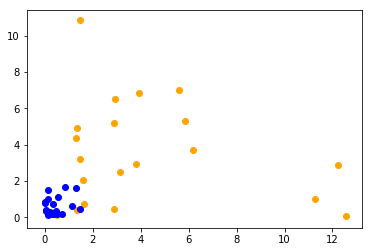

In [11]:
import matplotlib.pyplot as plt

x = np.append(np.random.exponential(4, (20,2)),np.random.exponential(0.5, (20,2)),0)
y = np.append(-np.ones(20),np.ones(20))
plt.scatter(x[:20,0],x[:20,1],c='orange')
plt.scatter(x[20:,0],x[20:,1],c='blue')
              
plt.show()
              
    

In [12]:
def PlotContourLine(func, value=0, minx=0, maxx=10, miny=0, maxy=10):
    #This plots the contourline func(x) = value
    
    samplenum = 1000
    xrange = np.arange(minx, maxx, (maxx-minx)/samplenum)
    yrange = np.arange(miny, maxy, (maxy-miny)/samplenum)
    
    #This generates a two-dimensional mesh
    X, Y = np.meshgrid(xrange,yrange)
    
    argsForf = np.array([X.flatten(),Y.flatten()]).T
    print(argsForf.shape)
    Z = func(argsForf)
    Z = np.reshape(Z,X.shape)
    
    plt.xlim(minx, maxx)
    plt.ylim(miny, maxy)
    plt.xlabel(r'$x_1$')
    plt.ylabel(r'$x_2$')
    #plt.contour(X, Y, Z, alpha=0.5,levels=[value],linestyles='dashed',linewidths=3)
    Z = np.where(Z > value, 1, -1)
    plt.contourf(X, Y, Z, alpha=0.2, colors=('red', 'blue'))

In [66]:
def SMO(cl, num_iter):
    for i in range(num_iter):
        indices = np.random.choice(np.arange(0,y.size-1), 2, False)
        cl.OneStep(indices[0], indices[1])
    print(cl.b)
    cl.b = cl.b - np.mean(np.extract(cl.beta > 0, cl.fx - cl.y))
    print(cl.b)
    return cl.f

for c in [0.01, 1, 100]:
    f = SMO(Classifier(x, y, c), 10000)
    PlotContourLine(f)
    plt.scatter(x[:20,0],x[:20,1], c='orange')
    plt.scatter(x[20:,0],x[20:,1],c='blue')
    plt.show()

[-4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16
 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16
 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16
 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16
 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16
 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16
 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16
 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16
 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16
 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16]
[-4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16
 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16
 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16
 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16
 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16
 -4.83671654e+16 -4.8367

[-4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16
 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16
 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16
 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16
 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16
 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16
 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16
 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16
 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16
 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16]
[-4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16
 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16
 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16
 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16
 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16
 -4.83671654e+16 -4.8367

[-4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16
 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16
 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16
 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16
 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16
 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16
 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16
 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16
 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16
 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16]
[-4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16
 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16
 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16
 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16
 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16
 -4.83671654e+16 -4.8367

 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16]
[-4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16
 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16
 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16
 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16
 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16
 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16
 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16
 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16
 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16
 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16]
[-4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16
 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16
 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16
 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16
 -4.83671654e+16 -4.836

[-4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16
 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16
 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16
 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16
 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16
 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16
 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16
 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16
 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16
 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16]
[-4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16
 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16
 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16
 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16
 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16
 -4.83671654e+16 -4.8367

[-4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16
 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16
 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16
 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16
 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16
 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16
 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16
 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16
 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16
 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16]
[-4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16
 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16
 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16
 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16
 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16
 -4.83671654e+16 -4.8367

 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16]
[-4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16
 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16
 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16
 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16
 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16
 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16
 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16
 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16
 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16
 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16]
[-4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16
 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16
 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16
 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16
 -4.83671654e+16 -4.836

[-4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16
 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16
 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16
 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16
 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16
 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16
 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16
 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16
 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16
 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16]
[-4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16
 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16
 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16
 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16
 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16
 -4.83671654e+16 -4.8367

[-4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16
 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16
 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16
 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16
 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16
 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16
 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16
 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16
 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16
 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16]
[-4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16
 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16
 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16
 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16
 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16
 -4.83671654e+16 -4.8367

 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16]
[-4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16
 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16
 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16
 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16
 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16
 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16
 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16
 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16
 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16
 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16]
[-4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16
 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16
 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16
 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16
 -4.83671654e+16 -4.836

[-4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16
 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16
 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16
 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16
 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16
 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16
 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16
 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16
 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16
 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16]
[-4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16
 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16
 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16
 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16
 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16
 -4.83671654e+16 -4.8367

[-4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16
 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16
 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16
 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16
 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16
 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16
 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16
 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16
 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16
 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16]
[-4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16
 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16
 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16
 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16
 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16
 -4.83671654e+16 -4.8367

[-4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16
 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16
 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16
 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16
 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16
 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16
 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16
 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16
 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16
 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16]
[-4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16
 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16
 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16
 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16
 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16
 -4.83671654e+16 -4.8367

[-4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16
 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16
 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16
 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16
 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16
 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16
 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16
 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16
 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16
 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16]
[-4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16
 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16
 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16
 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16
 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16
 -4.83671654e+16 -4.8367

[-4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16
 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16
 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16
 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16
 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16
 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16
 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16
 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16
 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16
 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16]
[-4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16
 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16
 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16
 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16
 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16
 -4.83671654e+16 -4.8367

 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16]
[-4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16
 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16
 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16
 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16
 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16
 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16
 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16
 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16
 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16
 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16]
[-4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16
 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16
 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16
 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16
 -4.83671654e+16 -4.836

 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16]
[-4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16
 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16
 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16
 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16
 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16
 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16
 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16
 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16
 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16
 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16]
[-4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16
 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16
 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16
 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16
 -4.83671654e+16 -4.836

[-4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16
 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16
 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16
 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16
 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16
 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16
 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16
 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16
 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16
 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16]
[-4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16
 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16
 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16
 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16
 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16
 -4.83671654e+16 -4.8367

[-4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16
 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16
 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16
 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16
 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16
 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16
 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16
 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16
 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16
 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16]
[-4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16
 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16
 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16
 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16
 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16
 -4.83671654e+16 -4.8367

 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16]
[-4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16
 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16
 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16
 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16
 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16
 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16
 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16
 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16
 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16
 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16]
[-4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16
 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16
 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16
 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16
 -4.83671654e+16 -4.836

 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16]
[-4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16
 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16
 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16
 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16
 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16
 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16
 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16
 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16
 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16
 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16]
[-4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16
 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16
 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16
 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16
 -4.83671654e+16 -4.836

 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16]
[-4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16
 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16
 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16
 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16
 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16
 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16
 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16
 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16
 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16
 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16]
[-4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16
 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16
 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16
 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16
 -4.83671654e+16 -4.836

[-4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16
 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16
 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16
 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16
 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16
 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16
 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16
 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16
 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16
 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16]
[-4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16
 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16
 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16
 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16
 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16
 -4.83671654e+16 -4.8367

[-4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16
 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16
 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16
 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16
 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16
 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16
 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16
 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16
 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16
 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16]
[-4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16
 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16
 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16
 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16
 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16
 -4.83671654e+16 -4.8367

 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16]
[-4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16
 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16
 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16
 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16
 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16
 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16
 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16
 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16
 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16
 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16]
[-4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16
 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16
 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16
 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16
 -4.83671654e+16 -4.836

 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16]
[-4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16
 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16
 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16
 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16
 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16
 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16
 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16
 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16
 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16
 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16]
[-4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16
 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16
 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16
 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16
 -4.83671654e+16 -4.836

[-4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16
 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16
 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16
 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16
 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16
 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16
 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16
 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16
 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16
 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16]
[-4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16
 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16
 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16
 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16
 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16
 -4.83671654e+16 -4.8367

[-4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16
 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16
 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16
 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16
 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16
 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16
 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16
 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16
 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16
 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16]
[-4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16
 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16
 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16
 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16
 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16
 -4.83671654e+16 -4.8367

 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16]
[-4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16
 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16
 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16
 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16
 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16
 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16
 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16
 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16
 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16
 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16]
[-4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16
 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16
 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16
 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16 -4.83671654e+16
 -4.83671654e+16 -4.836

KeyboardInterrupt: 

In [ ]:
#Load MNIST Data
import os
import gzip
from urllib.request import urlretrieve
def download (filename , source ='http :// yann. lecun .com/exdb/ mnist /'):
    print (" Downloading %s" % filename )
    urlretrieve ( source + filename , filename )


def load_mnist_images ( filename ):
    if not os.path. exists ( filename ):
        download ( filename )
    with gzip.open(filename , ’rb ’) as f:
        data = np. frombuffer (f.read () , np.uint8 , offset=16)
    data = data. reshape (-1, 28, 28)
    return data / np. float32 (256)

def load_mnist_labels ( filename ):
    if not os.path. exists ( filename ):
        download ( filename )
    with gzip.open(filename , ’rb ’) as f:
    data = np. frombuffer (f.read () , np.uint8 , offset=8)
    return data

X_train = load_mnist_images ('train -images -idx3 - ubyte .gz')
y_train = load_mnist_labels ('train -labels -idx1 - ubyte .gz')
X_test = load_mnist_images ('t10k -images -idx3 - ubyte .gz')
y_test = load_mnist_labels ('t10k -labels -idx1 - ubyte .gz')
